<a href="https://colab.research.google.com/github/andrniko/Various-Projects/blob/master/Corona_Statistics_Austria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**
This document will provide an overview of the  SARS-CoV-2 situation in Austria. The data is collected and made freely available by Daniel Breuss, on GitHub. His data is an aggregation of the official data given by the following state organs: Ministry of Health, Ministry of Social Affairs, Ministry of Inner Affairs.


# **Packages**


In [ ]:
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
!pip install bar_chart_race
import bar_chart_race as bcr
mpl.rcParams['figure.dpi'] = 250

     |████████████████████████████████| 163kB 9.3MB/s 


# **Importing Data**

In [ ]:
#Importing
url='https://raw.githubusercontent.com/Daniel-Breuss/covid-data-austria/master/austriadata.csv'
df=pd.read_csv(url,sep=',')

#Observing
print(df.head())
list(df.columns)

        Datum  Fälle_gesamt  ...  Wien_Intensiv  Wien_Tests
0  2020-12-12        320036  ...            138      923186
1  2020-12-11        317031  ...            127      913033
2  2020-12-10        314093  ...            129      902860
3  2020-12-09        311067  ...            130      892985
4  2020-12-08        308601  ...            127      885302

[5 rows x 69 columns]


['Datum',
 'Fälle_gesamt',
 'Fälle_Zuwachs',
 'Tote_v1',
 'Tote_v1_Zuwachs',
 'Tote_v2',
 'Tote_v2_Zuwachs',
 'Genesene',
 'Genesene_Zuwachs',
 'Hospitalisiert',
 'Intensivstation',
 'IBett_frei',
 'IBett_Kapazität',
 'Testungen',
 'Testungen_Zuwachs',
 'Burgenland',
 'Burgenland_Tote',
 'Burgenland_Genesene',
 'Burgenland_Spital',
 'Burgenland_Intensiv',
 'Burgenland_Tests',
 'Kärnten',
 'Kärnten_Tote',
 'Kärnten_Genesene',
 'Kärnten_Spital',
 'Kärnten_Intensiv',
 'Kärnten_Tests',
 'Niederösterreich',
 'Niederösterreich_Tote',
 'Niederösterreich_Genesene',
 'Niederösterreich_Spital',
 'Niederösterreich_Intensiv',
 'Niederösterreich_Tests',
 'Oberösterreich',
 'Oberösterreich_Tote',
 'Oberösterreich_Genesene',
 'Oberösterreich_Spital',
 'Oberösterreich_Intensiv',
 'Oberösterreich_Tests',
 'Salzburg',
 'Salzburg_Tote',
 'Salzburg_Genesene',
 'Salzburg_Spital',
 'Salzburg_Intensiv',
 'Salzburg_Tests',
 'Steiermark',
 'Steiermark_Tote',
 'Steiermark_Genesene',
 'Steiermark_Spital',
 'Stei

# **Constants**


In [ ]:
# Date of last data entry
todate=str(df['Datum'][0])
dateobj=datetime.strptime(todate,'%Y-%m-%d')
dateobj2=str(dateobj.strftime('%A, %d. %B %Y'))

# Names of the states
bundeslaender=['Wien','Niederösterreich','Burgenland','Steiermark','Kärnten','Salzburg','Oberösterreich','Tirol','Vorarlberg']
 
# Population of the states (Source:https://de.statista.com/statistik/daten/studie/75396/umfrage/entwicklung-der-bevoelkerung-in-oesterreich-nach-bundesland-seit-1996/#professional)
population=[1911191,1684287,294436,1246395,561293,757634,558410,1490279,397139]

In [ ]:
#Plotting functions

# All in one

def bigplot(lst,title,ylabel,divisor=1,multiplier=1):
  w,=plt.plot(df.index,multiplier*df[lst[0]]/divisor,label='Vienna')
  n,=plt.plot(df.index,multiplier*df[lst[1]]/divisor,label='Lower Austria')
  b,=plt.plot(df.index,multiplier*df[lst[2]]/divisor,label='Burgenland')
  st,=plt.plot(df.index,multiplier*df[lst[3]]/divisor,label='Styria')
  k,=plt.plot(df.index,multiplier*df[lst[4]]/divisor,label='Carinthia')
  s,=plt.plot(df.index,multiplier*df[lst[5]]/divisor,label='Salzburg')
  o,=plt.plot(df.index,multiplier*df[lst[6]]/divisor,label='Upper Austria')
  t,=plt.plot(df.index,multiplier*df[lst[7]]/divisor,label='Tyrol')
  v,=plt.plot(df.index,multiplier*df[lst[8]]/divisor,label='Vorarlberg')

  plt.grid(which='both',axis='both')
  plt.title(title) 
  plt.xlabel('Days since first confirmed case')
  plt.ylabel(ylabel)
  plt.legend(bbox_to_anchor=(1.05, 1), loc='best')
  plt.show()

def dataprint(lst,title,multiplier=1,divisor=1):
  print(str(title))
  print('Vienna: ',(multiplier*df[lst[0]][len(df)]/divisor))
  print('Lower Austria: ',(multiplier*df[lst[1]][len(df)]/divisor))
  print('Burgenland: ',(multiplier*df[lst[2]][len(df)]/divisor))
  print('Styria: ',(multiplier*df[lst[3]][len(df)]/divisor))
  print('Carinthia: ',(multiplier*df[lst[4]][len(df)]/divisor))
  print('Salzburg: ',(multiplier*df[lst[5]][len(df)]/divisor))
  print('Upper Austria: ' ,(multiplier*df[lst[6]][len(df)]/divisor))
  print('Tyrol: ',(multiplier*df[lst[7]][len(df)]/divisor))
  print('Vorarlberg: ',(multiplier*df[lst[8]][len(df)]/divisor))


# Split up

def smallplots(lst,title,divisor=1,multiplier=1):

  fig, axs = plt.subplots(3, 3,sharex=True, sharey=True)
  fig.tight_layout(pad=1.0)

  fig = plt.figure()
  fig.suptitle(title)


  #Vienna
  axs[0,0].plot(df.index,(multiplier*df[lst[0]]/divisor))
  axs[0,0].set_title('Vienna')
  axs[0,0].grid()

  #Lower Austria
  axs[0,1].plot(df.index,(multiplier*df[lst[1]]/divisor),c='orange')
  axs[0,1].set_title('Lower Austria')
  axs[0,1].grid()

  #Burgenland
  axs[0,2].plot(df.index,(multiplier*df[lst[2]]/divisor),c='g')
  axs[0,2].set_title('Burgenland')
  axs[0,2].grid()

  #Styria 
  axs[1,0].plot(df.index,(multiplier*df[lst[3]]/divisor),c='r')
  axs[1,0].set_title('Styria')
  axs[1,0].grid()

  #Carinthia
  axs[1,1].plot(df.index,(multiplier*df[lst[4]]/divisor),c='purple')
  axs[1,1].set_title('Carinthia')
  axs[1,1].grid()

  #Salzburg
  axs[1,2].plot(df.index,(multiplier*df[lst[5]]/divisor),c='brown')
  axs[1,2].set_title('Salzburg')
  axs[1,2].grid()

  #Upper Austria
  axs[2,0].plot(df.index,(multiplier*df[lst[6]]/divisor),c='pink')
  axs[2,0].set_title('Upper Austria')
  axs[2,0].grid()
  
  #Tyrol
  axs[2,1].plot(df.index,(multiplier*df[lst[7]]/divisor),c='gray')
  axs[2,1].set_title('Tyrol')
  axs[2,1].grid()
  
  #Vorarlberg
  axs[2,2].plot(df.index,(multiplier*df[lst[8]]/divisor),c='olive')
  axs[2,2].set_title('Vorarlberg')
  axs[2,2].grid()
  plt.show()


# **Data manipulation**




In [ ]:
# Removing NaN data
df=df.fillna(0)

In [ ]:
# Reversing the dataset so that the newest dates are at the bottom
df=df.iloc[::-1]

In [ ]:
# Adding days since first confirmed case
df['Tage']=0
for i in range(len(df)):
  df['Tage'][i]=len(df)-i

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
# Adding new cases per state
for bundesland in bundeslaender:
  df[str(bundesland+' neu')]=0
  for i in range (1,len(df)):
    df[bundesland+' neu'][i-1]=df[bundesland][i-1]-df[bundesland][i]

# Adding new tests per state
for bundesland in bundeslaender:
  df[str(bundesland+'_Tests_Zuwachs')]=0
  for i in range (1,len(df)):
    df[bundesland+'_Tests_Zuwachs'][i-1]=df[bundesland+'_Tests'][i-1]-df[bundesland+'_Tests'][i]

# Adding new deaths per state

for bundesland in bundeslaender:
  df[str(bundesland+'_Tote_Zuwachs')]=0
  for i in range (1,len(df)):
    df[bundesland+'_Tote_Zuwachs'][i]=df[bundesland+'_Tote'][i]-df[bundesland+'_Tote'][i-1]
    
    

# Adding new lists for graphing

new_cases=list((i+' neu' ) for i in bundeslaender)
total_cases=bundeslaender.copy
new_tests=list((i+'_Tests_Zuwachs' ) for i in bundeslaender)
new_deaths=list((i+'_Tote_Zuwachs' ) for i in bundeslaender)
hospitalisations=list((i+'_Spital' ) for i in bundeslaender)







/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
# Setting the days since as index
df.set_index('Tage',inplace=True)

In [ ]:
# Removing outliers from new tests in new tests in Tyrol
for i in range(1,len(df)):
  for j in new_tests:
    if df[j][i]>20000:
      df[j][i]=df[j].rolling(window=7).mean()[i-1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """



# **Plotting**

## Whole country


### Cases


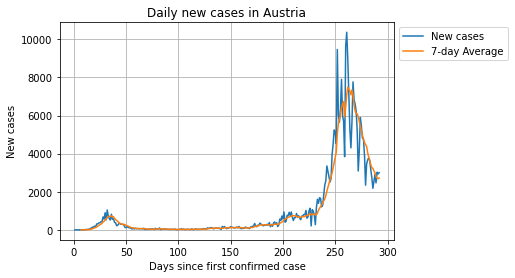

Saturday, 12. December 2020
New cases: 3005
7 day average: 2722


In [ ]:
at,=plt.plot(df.index,df['Fälle_Zuwachs'],label='New cases')
at_roll,=plt.plot(df.index,df['Fälle_Zuwachs'].rolling(window=7).mean(),label='7-day Average')
plt.title('Daily new cases in Austria')
plt.xlabel('Days since first confirmed case')
plt.ylabel('New cases')
plt.grid(which='both',axis='both')
plt.legend(bbox_to_anchor=(1, 1), loc='best')

plt.show()
print(dateobj2)
print('New cases: '+str(df['Fälle_Zuwachs'][len(df)]))
print('7 day average: '+str(int(df['Fälle_Zuwachs'].rolling(window=7).mean()[len(df)])))



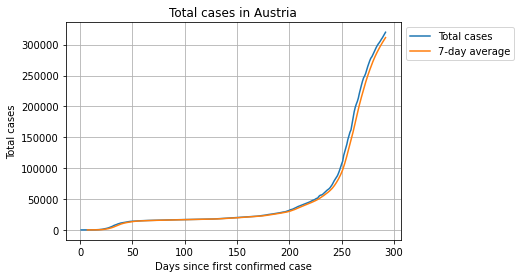

Saturday, 12. December 2020
Total cases: 320036
7 day average: 311381


In [ ]:
at,=plt.plot(df.index,df['Fälle_gesamt'],label='Total cases')
at_roll,=plt.plot(df.index,df['Fälle_gesamt'].rolling(window=7).mean(),label='7-day average')
plt.title('Total cases in Austria')
plt.xlabel('Days since first confirmed case')
plt.ylabel('Total cases')
plt.grid(which='both',axis='both')
plt.legend(bbox_to_anchor=(1, 1), loc='best')
#plt.yscale('log')
plt.show()
 
print(dateobj2)
print('Total cases: '+str(df['Fälle_gesamt'][len(df)]))
print('7 day average: '+str(int(df['Fälle_gesamt'].rolling(window=7).mean()[len(df)])))

### Tests


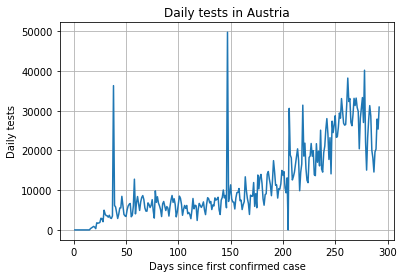

Saturday, 12. December 2020
New tests: 30917


In [ ]:
plt.plot(df.index,df['Testungen_Zuwachs'])
plt.title('Daily tests in Austria')
plt.xlabel('Days since first confirmed case')
plt.ylabel('Daily tests')
plt.grid(which='both',axis='both')
plt.show()

print(dateobj2)
print('New tests: '+str(int(df['Testungen_Zuwachs'][len(df)])))

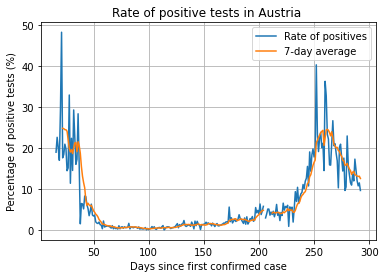

Saturday, 12. December 2020
Rate of positive tests: 10.0%
7-day average: 13.0%


In [ ]:
at,=plt.plot(df.index,(100*df['Fälle_Zuwachs']/df['Testungen_Zuwachs']),label='Rate of positives')
at_roll,=plt.plot(df.index,(100*df['Fälle_Zuwachs']/df['Testungen_Zuwachs']).rolling(window=7).mean(),label='7-day average')
plt.title('Rate of positive tests in Austria ')
plt.xlabel('Days since first confirmed case')
plt.ylabel('Percentage of positive tests (%)')
plt.grid(which='both',axis='both')
plt.legend(bbox_to_anchor=(1, 1), loc='best')
plt.show()


print(dateobj2)
print('Rate of positive tests: '+str(100*round(df['Fälle_Zuwachs'][len(df)]/df['Testungen_Zuwachs'][len(df)],2))+'%')
print('7-day average: '+str(100*round(df['Fälle_Zuwachs'][len(df)]/df['Testungen_Zuwachs'].rolling(window=7).mean()[len(df)],2))+'%')



### Deaths




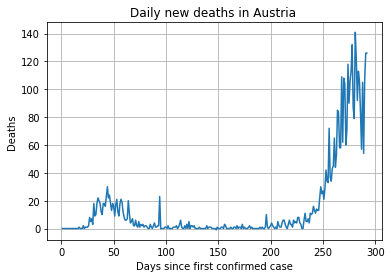

Saturday, 12. December 2020
New Deaths: 126.0


In [ ]:
plt.plot(df.index,df['Tote_v1_Zuwachs'])
plt.title('Daily new deaths in Austria ')
plt.xlabel('Days since first confirmed case')
plt.ylabel('Deaths')
plt.grid(which='both',axis='both')
 
plt.show()
 
 
print(dateobj2)
print('New Deaths: '+str(df['Tote_v1_Zuwachs'][len(df)]))
#print(max(df['Tote_v1_Zuwachs'])+)
###

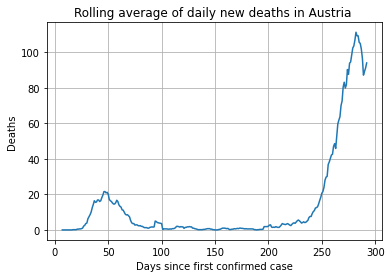

Saturday, 12. December 2020
7-day average: 94.0


In [ ]:
plt.plot(df.index,df['Tote_v1_Zuwachs'].rolling(window=7).mean())
plt.title('Rolling average of daily new deaths in Austria ')
plt.xlabel('Days since first confirmed case')
plt.ylabel('Deaths')
#plt.yscale('log')
plt.grid(which='both',axis='both')
 
plt.show()
 
 
print(dateobj2)
print('7-day average: '+str(round(df['Tote_v1_Zuwachs'].rolling(window=7).mean()[len(df)],0)))

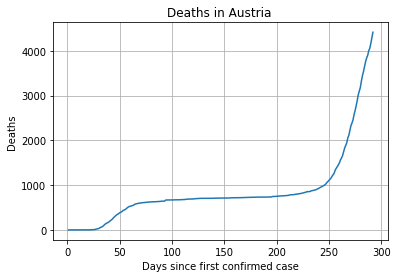

Saturday, 12. December 2020
Total Deaths: 4415


In [ ]:
plt.plot(df.index,df['Tote_v1'])
plt.title('Deaths in Austria ')
plt.xlabel('Days since first confirmed case')
plt.ylabel('Deaths')
plt.grid(which='both',axis='both')

plt.show()


print(dateobj2)
print('Total Deaths: '+str(int(df['Tote_v1'][len(df)])))



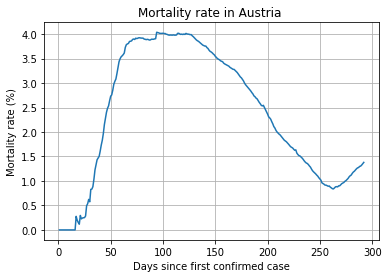

Saturday, 12. December 2020
Mortality rate: 1.4000000000000001%


In [ ]:
plt.plot(df.index,(100*(df['Tote_v1']/df['Fälle_gesamt'])))
plt.title('Mortality rate in Austria ')
plt.xlabel('Days since first confirmed case')
plt.ylabel('Mortality rate (%)')
plt.grid(which='both',axis='both')

plt.show()


print(dateobj2)
print('Mortality rate: '+str(100*round(df['Tote_v1'][len(df)]/df['Fälle_gesamt'][len(df)],3))+'%')


### Hospitals


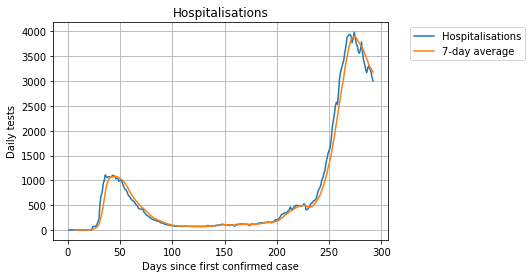

Saturday, 12. December 2020
People currently in a hospital: 3008
7-day average: 3181


In [ ]:
hosp,=plt.plot(df.index,df['Hospitalisiert'],label='Hospitalisations')
hosp_avg,=plt.plot(df.index,df['Hospitalisiert'].rolling(window=7).mean(),label='7-day average')
plt.title('Hospitalisations')
plt.xlabel('Days since first confirmed case')
plt.ylabel('Daily tests')
plt.grid(which='both',axis='both')
plt.legend(bbox_to_anchor=(1.05, 1), loc='best')

plt.show()

print(dateobj2)
print('People currently in a hospital: '+str(int(df['Hospitalisiert'][len(df)])))
print('7-day average: '+str(int(df['Hospitalisiert'].rolling(window=7).mean()[len(df)])))

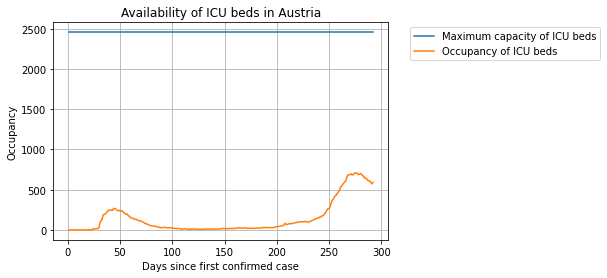

Saturday, 12. December 2020
ICU beds occupied: 591/2457
ICU beds available: 1866


In [ ]:
bett_frei,=plt.plot(df.index,[2457]*len(df),label='Maximum capacity of ICU beds')
plt.plot(df.index,df['Intensivstation'],label='Occupancy of ICU beds')
plt.title('Availability of ICU beds in Austria')
plt.ylabel('Occupancy')
plt.xlabel('Days since first confirmed case')
plt.grid(which='both',axis='both')
plt.legend(bbox_to_anchor=(1.05, 1), loc='best')

plt.show()
print(dateobj2)
print('ICU beds occupied: '+str(int(df['Intensivstation'][len(df)]))+'/2457')
print('ICU beds available: '+ str(int(2457-df['Intensivstation'][len(df)])))


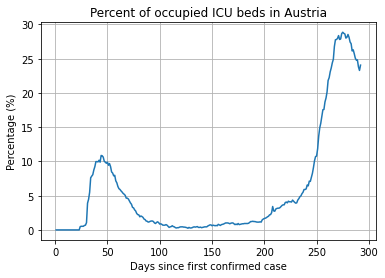

ICU occupation rate (Saturday, 12. December 2020): 24.05%


In [ ]:
plt.plot(df.index,100*df['Intensivstation']/([2457]*len(df)))

plt.xlabel('Days since first confirmed case')
plt.ylabel('Percentage (%)')
plt.title('Percent of occupied ICU beds in Austria')
plt.grid(which='both',axis='both')
plt.show()


print('ICU occupation rate ('+dateobj2+'): '+ str((round(100*(df['Intensivstation'][len(df)])/2457,2)))+'%')


## Overview per state

In [ ]:
df1 = df[bundeslaender].copy()
bcr.bar_chart_race(df1,title='Total cases per state')

### Cases

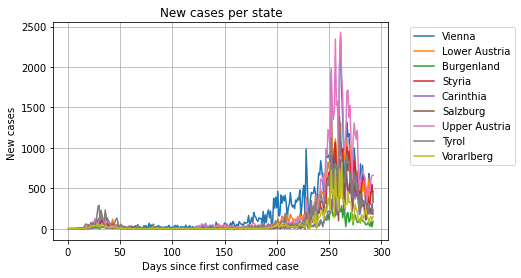

New cases per state(Saturday, 12. December 2020)
Vienna:  459.0
Lower Austria:  465.0
Burgenland:  89.0
Styria:  331.0
Carinthia:  230.0
Salzburg:  181.0
Upper Austria:  662.0
Tyrol:  437.0
Vorarlberg:  151.0


In [34]:
bigplot(new_cases,'New cases per state','New cases ')
dataprint(new_cases,'New cases per state('+dateobj2+')')


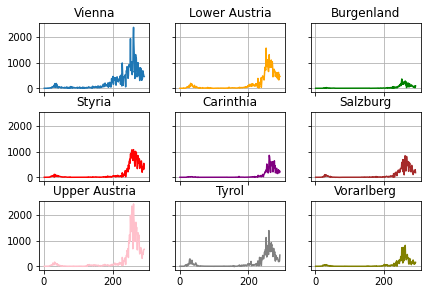

<Figure size 432x288 with 0 Axes>

In [ ]:
smallplots(new_cases,'New cases per state',divisor=1)


#### Contribution of new cases per state

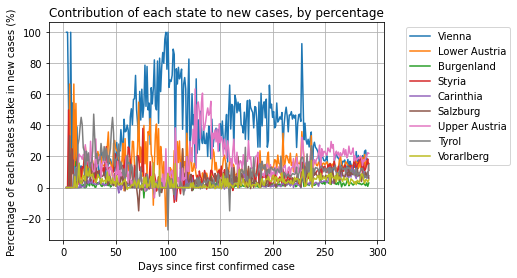

Percentual contribution of new cases (Saturday, 12. December 2020)
Vienna:  15.274542429284526
Lower Austria:  15.474209650582363
Burgenland:  2.961730449251248
Styria:  11.014975041597339
Carinthia:  7.653910149750416
Salzburg:  6.023294509151414
Upper Austria:  22.029950083194677
Tyrol:  14.54242928452579
Vorarlberg:  5.02495840266223


In [37]:
bigplot(new_cases,'Contribution of each state to new cases, by percentage','Percentage of each states stake in new cases (%)',df['Fälle_Zuwachs'],100)
dataprint(new_cases,'Percentual contribution of new cases ('+dateobj2+')',100,df['Fälle_Zuwachs'][len(df)])

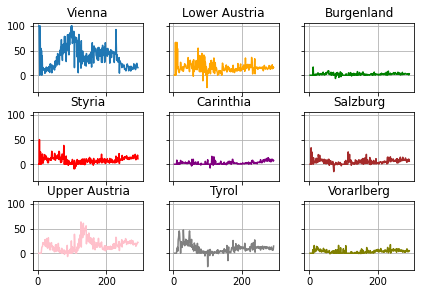

<Figure size 432x288 with 0 Axes>

In [35]:
smallplots(new_cases,'Percentual contribution of each state to new cases('+dateobj2+')',df['Fälle_Zuwachs'],100)

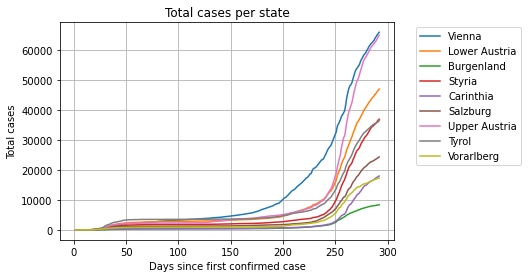

Total cases per state(Saturday, 12. December 2020)
Vienna:  66084.0
Lower Austria:  47095.0
Burgenland:  8405.0
Styria:  37009.0
Carinthia:  18027.0
Salzburg:  24360.0
Upper Austria:  65115.0
Tyrol:  36561.0
Vorarlberg:  17380.0


In [38]:
bigplot(bundeslaender,'Total cases per state','Total cases')
dataprint(bundeslaender,'Total cases per state('+dateobj2+')')

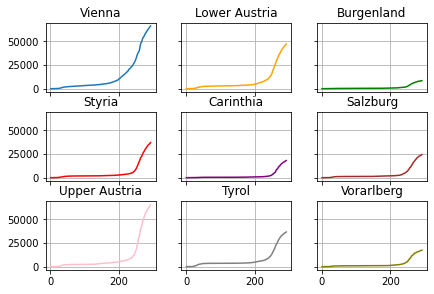

<Figure size 432x288 with 0 Axes>

In [ ]:
smallplots(bundeslaender,'Total cases per state')

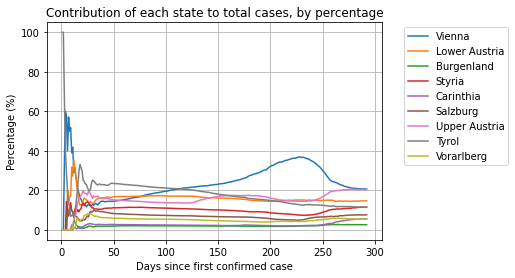

Total cases percentually by state (Saturday, 12. December 2020):
Vienna:  20.648926995712984
Lower Austria:  14.715532002649702
Burgenland:  2.626267044957442
Styria:  11.56401154870077
Carinthia:  5.632803809571423
Salzburg:  7.611643690084866
Upper Austria:  20.346148558287194
Tyrol:  11.424027296929095
Vorarlberg:  5.430639053106526


In [39]:
bigplot(bundeslaender,'Contribution of each state to total cases, by percentage','Percentage (%)',df['Fälle_gesamt'],100)
dataprint(bundeslaender,'Total cases percentually by state ('+dateobj2+'):',100,df['Fälle_gesamt'][len(df)])

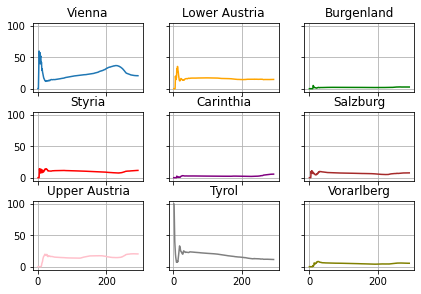

<Figure size 432x288 with 0 Axes>

In [41]:
smallplots(bundeslaender,'lol',df['Fälle_gesamt'],100)

### Tests

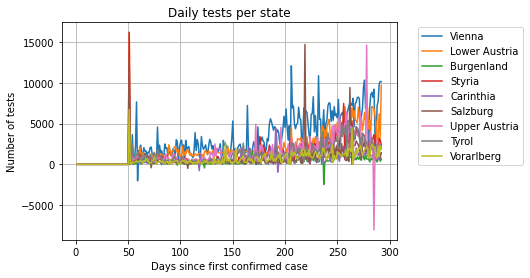

Number of tests (Saturday, 12. December 2020)
Vienna:  10153.0
Lower Austria:  9722.0
Burgenland:  633.0
Styria:  2372.0
Carinthia:  700.0
Salzburg:  1421.0
Upper Austria:  2100.0
Tyrol:  1993.0
Vorarlberg:  1823.0


In [43]:
bigplot(new_tests,'Daily tests per state','Number of tests')
dataprint(new_tests,'Number of new tests ('+dateobj2+')')
